<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/keras.applications/KA_2_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot as plt

In [5]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [6]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [7]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [10]:
base_model = VGG16(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

58889256/58889256 [==============================] - 1s 0us/step


In [12]:
for layer in base_model.layers:
  layer.trainable = False

In [13]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

Epoch 1/10
71/71 [==============================] - 356s 5s/step - loss: 0.9693 - accuracy: 0.6704 - val_loss: 0.5644 - val_accuracy: 0.6840
Epoch 2/10
71/71 [==============================] - 12s 174ms/step - loss: 0.3568 - accuracy: 0.8521 - val_loss: 0.3991 - val_accuracy: 0.8480
Epoch 3/10
71/71 [==============================] - 13s 175ms/step - loss: 0.2512 - accuracy: 0.9120 - val_loss: 0.6001 - val_accuracy: 0.7280
Epoch 4/10
71/71 [==============================] - 13s 177ms/step - loss: 0.1556 - accuracy: 0.9689 - val_loss: 0.5610 - val_accuracy: 0.7680
Epoch 5/10
71/71 [==============================] - 13s 178ms/step - loss: 0.1180 - accuracy: 0.9747 - val_loss: 0.3942 - val_accuracy: 0.8480
Epoch 6/10
71/71 [==============================] - 12s 169ms/step - loss: 0.0854 - accuracy: 0.9853 - val_loss: 0.4474 - val_accuracy: 0.8320
Epoch 7/10
71/71 [==============================] - 12s 174ms/step - loss: 0.0604 - accuracy: 0.9933 - val_loss: 0.5692 - val_accuracy: 0.7920
E

In [16]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

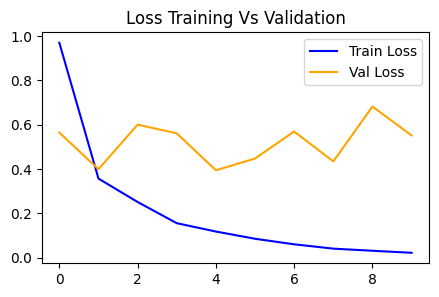

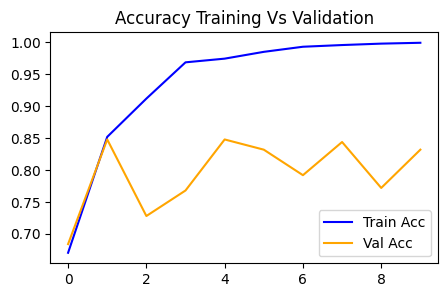

In [17]:
show_result(history)